# Activations

# ReLU Activation Function

Pseudocode for the above is simply:

```python
import numpy as np

inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = []

for i in inputs:
    output.append(np.maximum(i, 0))
```

In [2]:
import numpy as np


class LayerDense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases


class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

## Testing

In [3]:
from nnfs.datasets import spiral_data


X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense(2, 3)

activation1 = ReLU()

dense1.forward(X)

activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.16242288e-05 0.00000000e+00]
 [0.00000000e+00 2.47995533e-05 0.00000000e+00]
 [0.00000000e+00 1.10183500e-04 0.00000000e+00]
 [0.00000000e+00 3.27072690e-04 0.00000000e+00]]


# Softmax

The softmax activation is a function that converts a range of inputs into a normalized set of inputs and which can be considered as a probability distribution (i.e. the numbers sum up to 1). The exponential function is used to achieve this. See the image below for the formula.

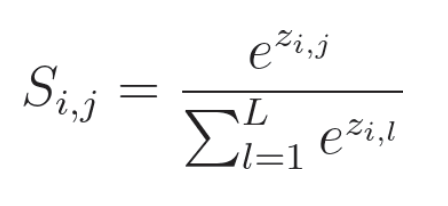

In [2]:
from PIL import Image
from IPython.display import display

image_path = 'softmax_function.png'

# Open and display the image
image = Image.open(image_path)
display(image)

In [1]:
import numpy as np


class Softmax:
    def forward(self, inputs):
        # We do a subtraction here for unnormalized probabilities
        # (See explanation above)
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        # Then we normalize for each item in exp_values
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

## Challenges with the Softmax function

The exponential function increases greatly as the input increases. What we want to do is prevent overflow. And because the exponential function tends towards 0 as its input value approaches negative infinity, and the output is 1 when the input is 0, we can use this useful property to prevent the exponential function from overflowing.

The solution is to ensure that the range of inputs are in a range of some negative value up to 0. To do this, we can take the maximum value of the range of inputs and subtract it from each of the values in the range. With Softmax and the inherent normalization it achieves, subtracting any value from each of the values (for so long as it's subtracted equally on each item) will not change the final output of the Softmax operation.

```python
softmax = Softmax()

softmax.forward([[1,2,3]])
print(softmax.output)

>>> [[ 0.09003057 0.24472847 0.66524096 ]]

softmax.forward([[-2,-1,0]])
print(softmax.output)

>>> [[ 0.09003057 0.24472847 0.66524096 ]]
```

This is the reason why the subtraction of `np.max(...)` in the forward function above makes sense.